In [39]:
import re
import json
import pickle
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
def clean_str(s):
    return re.sub(r'\s', '', s)

def are_equal(a , b):
    return clean_str(a) == clean_str(b)

def a_in_b(a , b):
    return clean_str(a) in clean_str(b)

def add_cols (df, columns, default_value = 0):
    for k, e in enumerate(columns):
        i = common_data([e], df.columns, are_equal)

        if i == -1:
            df[e] = default_value
    return df

def common_data(list1, list2, comparisonf): 
    result = -1
  
    for k, x in enumerate(list1): 
        for y in list2: 
            
            if comparisonf(x,y):
                result = k
                return result  
                  
    return result

def prepare_data(df, feat2dummie, cols_to_pow, columns, drop_first = True, max_pow = 3):
    
    for i in feat2dummie:
        one_hot = pd.get_dummies(df[i], prefix=i, drop_first=drop_first)
        df = df.drop(i,axis = 1)
        df = df.join(one_hot)

    is_recid, is_violent_recid = df['is_recid'], df['is_violent_recid']

    columns_to_drop = ['is_recid', 'is_violent_recid']
    df = df.drop(columns_to_drop, axis=1)
    
    dft = df.copy()

    for k,i in enumerate(cols_to_pow):
        for j in range(1, max_pow):
            dft[i+str(j+1)] = pow(df[i], j+1)
    
    dft = add_cols(dft, columns)
    
    return dft, is_recid, is_violent_recid

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data_folder = './data'
model_folder = './model'
interpretation_result_folder = './audit_result'

train_dataset = 'train_compas_processed.xlsx'
validate_dataset = 'validate_compas_processed.xlsx'
model_colums_sample = 'model_colums_sample.xlsx'

model_file_name = 'rf_recidivism_prediction.sav'


interpretation_tree_filename = 'forest_tree_interpretation'

### Load data

In [6]:
train_df_init = pd.read_excel (data_folder+'/'+train_dataset)
validate_df_init = pd.read_excel (data_folder+'/'+validate_dataset)

train_df = train_df_init
validate_df = validate_df_init

In [7]:
columns = pd.read_excel (data_folder+'/'+model_colums_sample).columns

In [8]:
train_df.shape

(8918, 14)

In [9]:
validate_df.shape

(470, 14)

#### Prepare data for prediction

In [40]:
max_pow = 3
drop_first = True

feat2dummie = ['sex','age_cat','race','c_charge_degree','c_cat','weapon_firearm']
cols_to_pow = ['age','decile_score','priors_count','juv_count']

validate_df_processed, is_recid, is_violent_recid = prepare_data(validate_df, feat2dummie, cols_to_pow, columns, drop_first = True, max_pow = 3)

In [41]:
#df.shape

In [42]:
#df.head(10)

### Load model

In [43]:
rfc = pickle.load(open(model_folder+'/'+model_file_name, 'rb'))

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWa

In [44]:
train_df_processed, is_recid2, is_violent_recid2 = prepare_data(train_df, feat2dummie, cols_to_pow, columns, drop_first = True, max_pow = 3)

train_df_processed['prediction'] = rfc.predict(train_df_processed)

In [45]:
train_df_processed.head(10)

,age,decile_score,priors_count,days_b_screening_arrest,c_days_from_compas,juv_count,prediction,sex_Male,age_cat_Greater than 45,age_cat_Less than 25,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,c_charge_degree_M,c_cat_battery,c_cat_burglary,c_cat_cannabis,c_cat_driving,c_cat_grand theft,c_cat_lewdness,c_cat_mischief,c_cat_no charge,c_cat_other,c_cat_poss,c_cat_sexual,c_cat_tampering,weapon_firearm_True,age2,age3,decile_score2,decile_score3,priors_count2,priors_count3,juv_count2,juv_count3,sex_Female,age_cat_25 - 45,race_African-American,c_charge_degree_F,c_cat_assault,weapon_firearm_False
0,42,4,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1764,74088,16,64,9,27,0,0,0,0,0,0,0,0
1,41,1,0,-1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1681,68921,1,1,0,0,0,0,0,0,0,0,0,0
2,23,5,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,529,12167,25,125,0,0,0,0,0,0,0,0,0,0
3,24,5,1,-1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,576,13824,25,125,1,1,0,0,0,0,0,0,0,0
4,25,7,6,-1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,625,15625,49,343,36,216,1,1,0,0,0,0,0,0
5,24,3,3,-1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,576,13824,9,27,9,27,0,0,0,0,0,0,0,0
6,39,1,1,-25,25,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1521,59319,1,1,1,1,0,0,0,0,0,0,0,0
7,21,2,0,-1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,441,9261,4,8,0,0,0,0,0,0,0,0,0,0
8,48,4,8,-1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2304,110592,16,64,64,512,0,0,0,0,0,0,0,0
9,28,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,784,21952,1,1,0,0,0,0,0,0,0,0,0,0


In [46]:
train_df['prediction'] = train_df_processed['prediction']

## 1. Bias detection in the data

Required data preprocessing. True labels should be in column `label_value`, predicted labels in column `score`. Any other column passed to `BiasDetection` class will be considered as protected property and statistical tests will be run on it

In [47]:
bias_df = train_df[['prediction', 'is_recid', 'race', 'sex', 'age_cat']]
bias_df = bias_df.rename(columns={'is_recid':'label_value', 'prediction':'score'})
bias_df.head()

,score,label_value,race,sex,age_cat
0,0,0,Caucasian,Male,25 - 45
1,0,0,Caucasian,Male,25 - 45
2,0,0,Asian,Male,Less than 25
3,0,1,African-American,Male,Less than 25
4,0,0,African-American,Male,25 - 45


In [48]:
import bias_detection.bias_detection as bd

bias = bd.BiasDetection(bias_df)

### Analysing dataset bias

First of all, we check the bias of a model and a dataset itself. For the dataset bias, we require that protected properties of an individual do not have a strong influence on the decision. That is, the library splits the dataset into groups based on protected property. If the percentage of positive labels is beyond [20% neighborhood](https://en.wikipedia.org/wiki/Disparate_impact) for all groups, then it is deemed to have a bias in respect to that protected property.

In [49]:
import pprint

dataset_bias_info = bias.check_dataset_bias()

pp = pprint.PrettyPrinter()
pp.pprint(dataset_bias_info)

{'details': {'age_cat': {'fair': False,
                         'ratios': {'25 - 45': 0.3452615021627998,
                                    'Greater than 45': 0.23901673640167365,
                                    'Less than 25': 0.4234375}},
             'race': {'fair': False,
                      'ratios': {'African-American': 0.40743243243243243,
                                 'Asian': 0.17073170731707318,
                                 'Caucasian': 0.28217503217503215,
                                 'Hispanic': 0.2542372881355932,
                                 'Native American': 0.3076923076923077,
                                 'Other': 0.24253731343283583}},
             'sex': {'fair': True,
                     'ratios': {'Female': 0.24415443175638935,
                                'Male': 0.3640344681452182}}},
 'fair': False}


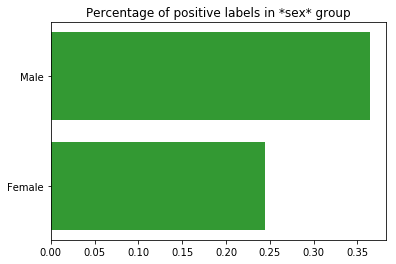

In [50]:
bias.plot_dataset_bias(dataset_bias_info, 'sex')

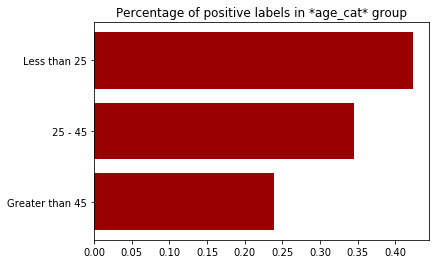

In [51]:
bias.plot_dataset_bias(dataset_bias_info, 'age_cat')

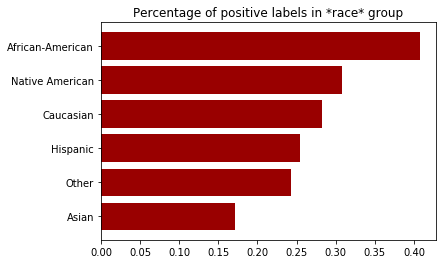

In [52]:
bias.plot_dataset_bias(dataset_bias_info, 'race')

### Analysing model bias

Now we analise the bias of the model itself. We can get bias summary with reqired level of detalization with `get_model_fairness` function. Available levels are `model`, `attribute`, and `value`. Each gives overview of fairness on model, attribute, and groups within each attribute (all kind of races) respectively

In [53]:
bias.get_model_fairness(level='model')

model_id, score_thresholds 1 {'rank_abs': [0]}
get_disparity_major_group()


{'Overall Fairness': False,
 'Supervised Fairness': False,
 'Unsupervised Fairness': True}

In [54]:
bias.get_model_fairness(level='attribute')

model_id, score_thresholds 1 {'rank_abs': [0]}
get_disparity_major_group()


,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,1,binary 0/1,age_cat,NaN,NaN,NaN,NaN,False,True,NaN,True,True,NaN,NaN,False,NaN,NaN,False
1,1,binary 0/1,race,NaN,NaN,NaN,NaN,False,True,NaN,True,False,NaN,NaN,False,NaN,NaN,False
2,1,binary 0/1,sex,NaN,NaN,NaN,NaN,False,True,NaN,True,True,NaN,NaN,False,NaN,NaN,False


In [55]:
bias.get_model_fairness(level='value')

model_id, score_thresholds 1 {'rank_abs': [0]}
get_disparity_major_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,1,binary 0/1,0,race,African-American,0.0,1.0,0.407432,NaN,0.0,1.0,0.592568,NaN,0,4440,NaN,0.0,0,1809,2631,0,1809,2631,4440,8918,0.407432,NaN,NaN,NaN,NaN,1.000000,NaN,1.0,NaN,1.0,1.000000,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,NaN,NaN,NaN,NaN,True,True,NaN,True,True,NaN,NaN,True,NaN,NaN,False
1,1,binary 0/1,0,race,Asian,0.0,1.0,0.170732,NaN,0.0,1.0,0.829268,NaN,0,41,NaN,0.0,0,7,34,0,7,34,41,8918,0.170732,NaN,NaN,NaN,NaN,0.419043,NaN,1.0,NaN,1.0,1.399449,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,NaN,NaN,NaN,NaN,False,True,NaN,True,False,NaN,NaN,False,NaN,NaN,False
2,1,binary 0/1,0,race,Caucasian,0.0,1.0,0.282175,NaN,0.0,1.0,0.717825,NaN,0,3108,NaN,0.0,0,877,2231,0,877,2231,3108,8918,0.282175,NaN,NaN,NaN,NaN,0.692569,NaN,1.0,NaN,1.0,1.211381,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,NaN,NaN,NaN,NaN,False,True,NaN,True,True,NaN,NaN,False,NaN,NaN,False
3,1,binary 0/1,0,race,Hispanic,0.0,1.0,0.254237,NaN,0.0,1.0,0.745763,NaN,0,767,NaN,0.0,0,195,572,0,195,572,767,8918,0.254237,NaN,NaN,NaN,NaN,0.623999,NaN,1.0,NaN,1.0,1.258528,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,NaN,NaN,NaN,NaN,False,True,NaN,True,False,NaN,NaN,False,NaN,NaN,False
4,1,binary 0/1,0,race,Native American,0.0,1.0,0.307692,NaN,0.0,1.0,0.692308,NaN,0,26,NaN,0.0,0,8,18,0,8,18,26,8918,0.307692,NaN,NaN,NaN,NaN,0.755198,NaN,1.0,NaN,1.0,1.168319,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,NaN,NaN,NaN,NaN,False,True,NaN,True,True,NaN,NaN,False,NaN,NaN,False
5,1,binary 0/1,0,race,Other,0.0,1.0,0.242537,NaN,0.0,1.0,0.757463,NaN,0,536,NaN,0.0,0,130,406,0,130,406,536,8918,0.242537,NaN,NaN,NaN,NaN,0.595282,NaN,1.0,NaN,1.0,1.278272,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,NaN,NaN,NaN,NaN,False,True,NaN,True,False,NaN,NaN,False,NaN,NaN,False
6,1,binary 0/1,0,sex,Female,0.0,1.0,0.244154,NaN,0.0,1.0,0.755846,NaN,0,1839,NaN,0.0,0,449,1390,0,449,1390,1839,8918,0.244154,NaN,NaN,NaN,NaN,0.670690,NaN,1.0,NaN,1.0,1.188501,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,NaN,NaN,NaN,NaN,False,True,NaN,True,True,NaN,NaN,False,NaN,NaN,False
7,1,binary 0/1,0,sex,Male,0.0,1.0,0.364034,NaN,0.0,1.0,0.635966,NaN,0,7079,NaN,0.0,0,2577,4502,0,2577,4502,7079,8918,0.364034,NaN,NaN,NaN,NaN,1.000000,NaN,1.0,NaN,1.0,1.000000,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,NaN,NaN,NaN,NaN,True,True,NaN,True,True,NaN,NaN,True,NaN,NaN,False
8,1,binary 0/1,0,age_cat,25 - 45,0.0,1.0,0.345262,NaN,0.0,1.0,0.654738,NaN,0,5086,NaN,0.0,0,1756,3330,0,1756,3330,5086,8918,0.345262,NaN,NaN,NaN,NaN,1.000000,NaN,1.0,Na

Below we can see some useful visualization of fairness for `value` level with `plot_fairness` function. Red and green colors indicates which values are classified fairly by model and which aren't. There are two modes for visualization: with absolute and relative values respectively

model_id, score_thresholds 1 {'rank_abs': [0]}
get_disparity_major_group()


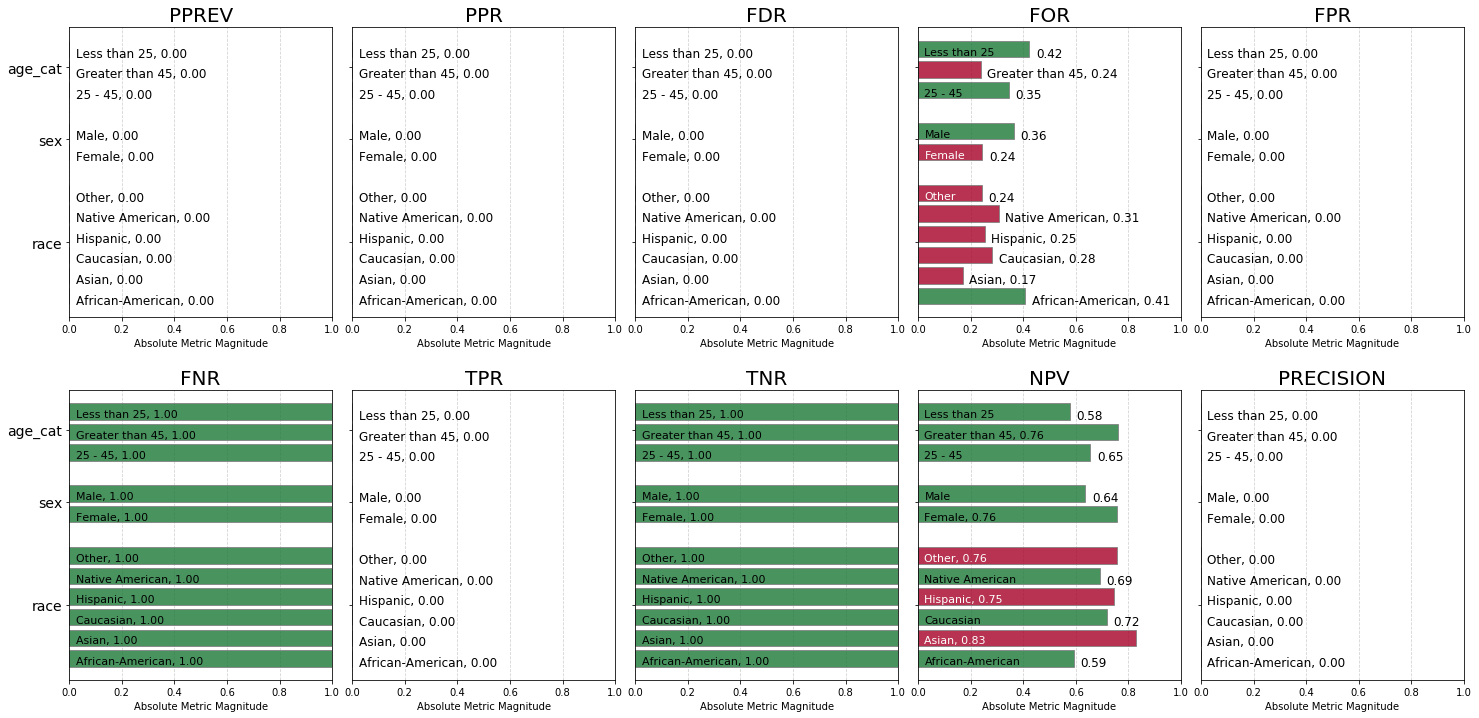

In [56]:
fg = bias.plot_fairness(is_absolute=True)

model_id, score_thresholds 1 {'rank_abs': [0]}
get_disparity_major_group()


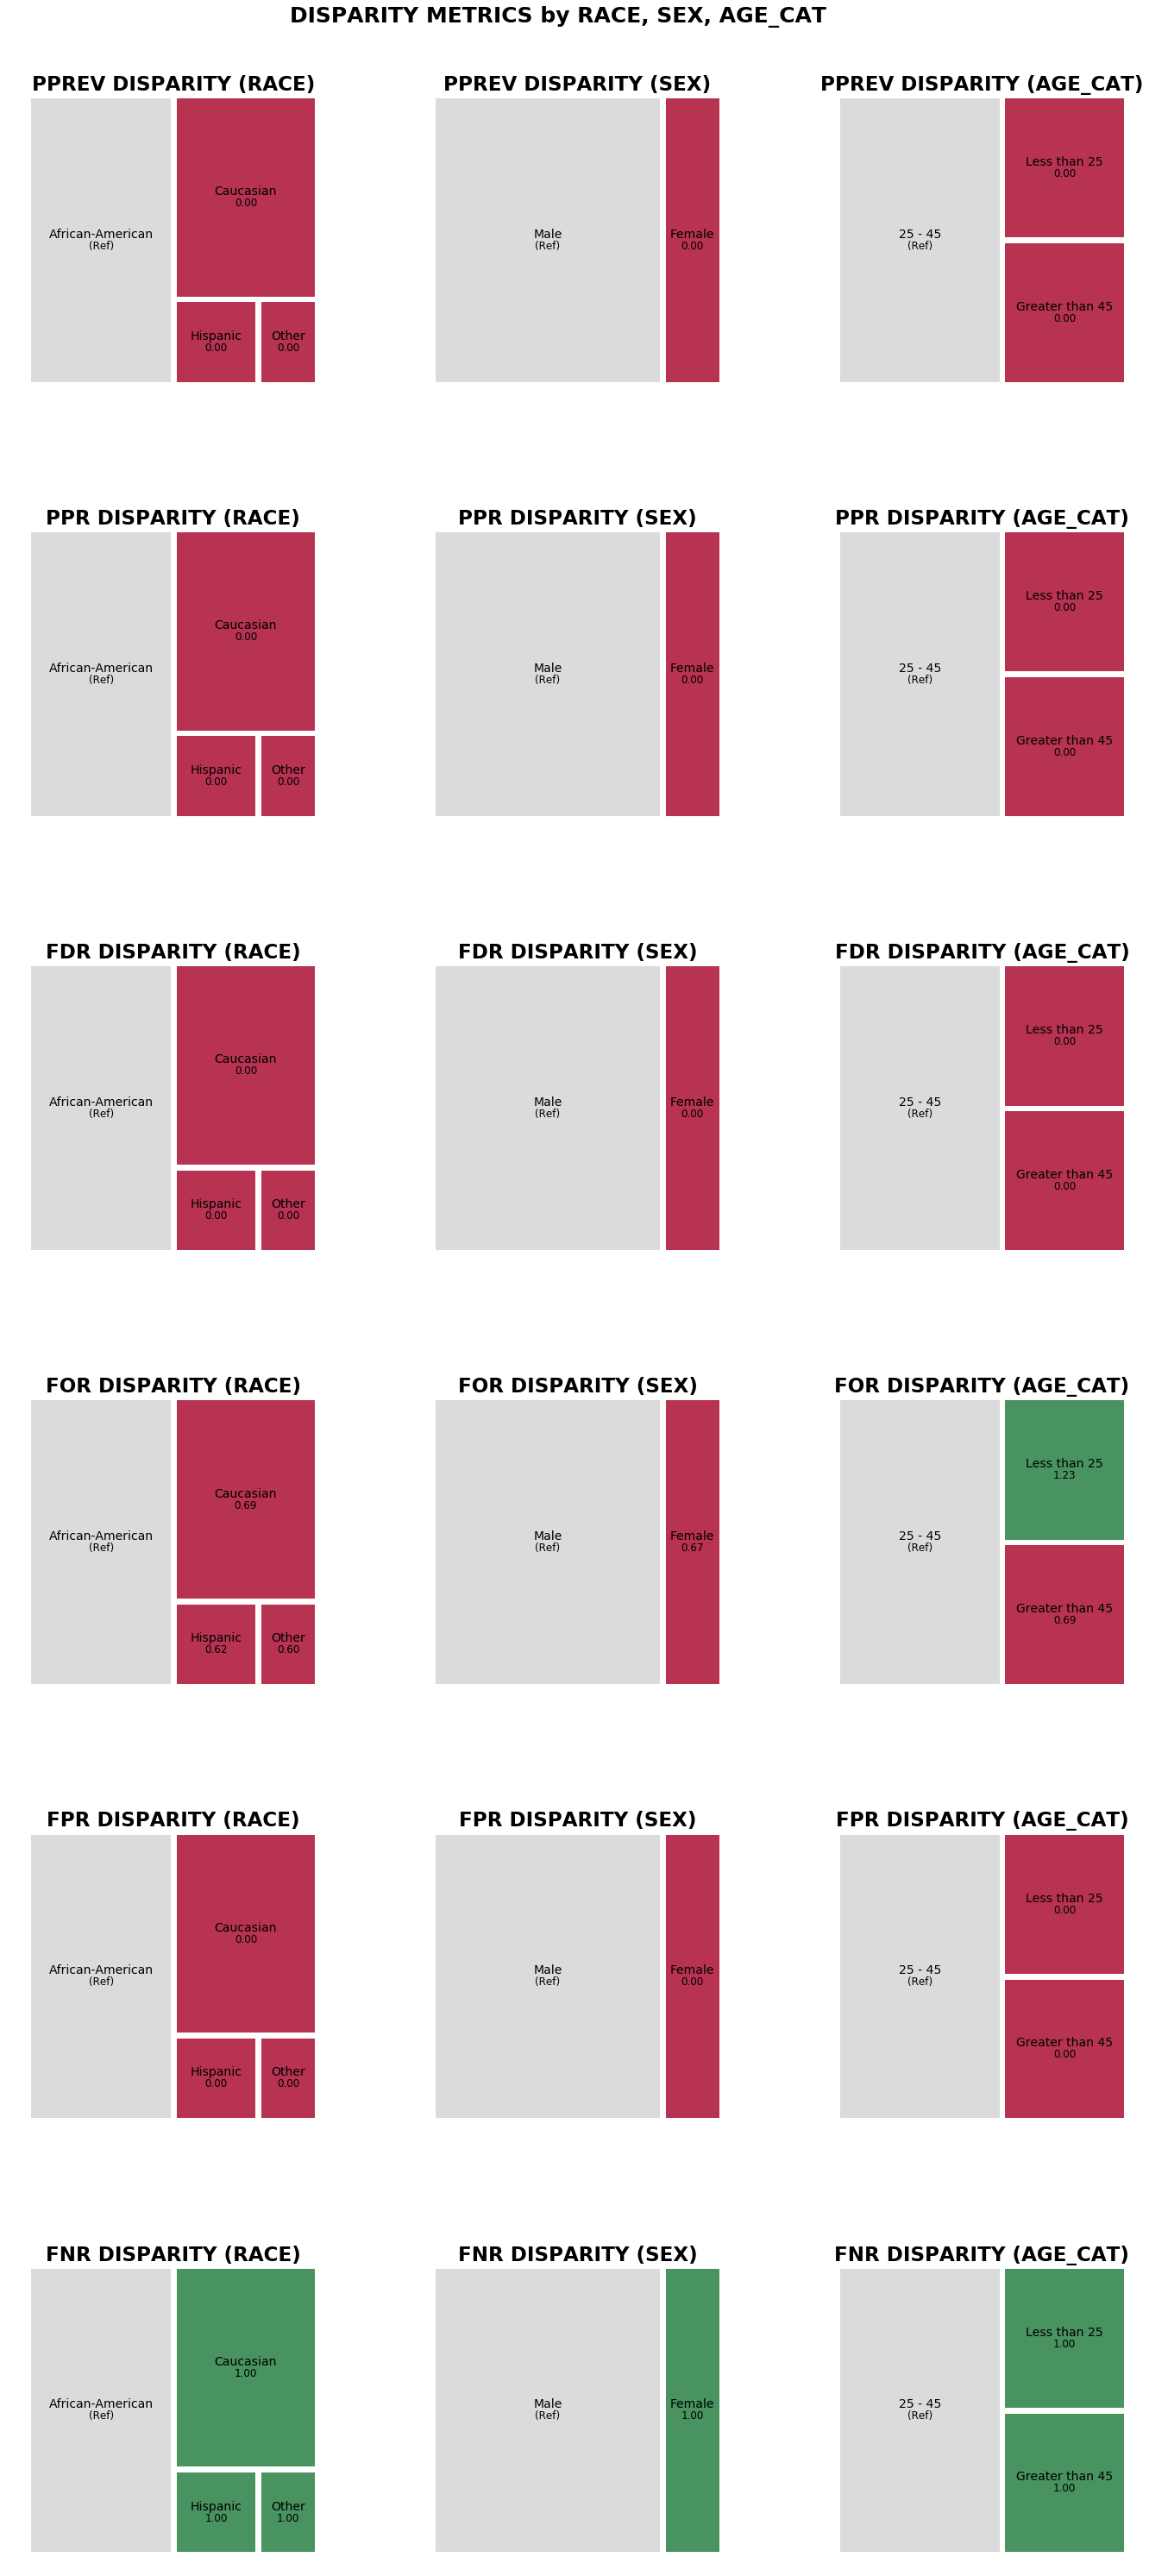

In [57]:
fg = bias.plot_fairness(is_absolute=False)

## 2. Feature selection from the data

### Oleg M

In [28]:
train_df.head()

,sex,age,age_cat,race,decile_score,priors_count,days_b_screening_arrest,c_days_from_compas,c_charge_degree,is_recid,is_violent_recid,juv_count,c_cat,weapon_firearm,prediction
0,Male,42,25 - 45,Caucasian,4,3,0,0,F,0,0,0,poss,False,0
1,Male,41,25 - 45,Caucasian,1,0,-1,1,M,0,0,0,battery,False,0
2,Male,23,Less than 25,Asian,5,0,0,1,F,0,0,0,grand theft,False,0
3,Male,24,Less than 25,African-American,5,1,-1,1,F,1,0,0,poss,False,0
4,Male,25,25 - 45,African-American,7,6,-1,0,M,0,0,1,no charge,False,0


In [29]:
train_df_processed.head()

,age,decile_score,priors_count,days_b_screening_arrest,c_days_from_compas,juv_count,sex_Male,age_cat_Greater than 45,age_cat_Less than 25,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,c_charge_degree_M,c_cat_battery,c_cat_burglary,c_cat_cannabis,c_cat_driving,c_cat_grand theft,c_cat_lewdness,c_cat_mischief,c_cat_no charge,c_cat_other,c_cat_poss,c_cat_sexual,c_cat_tampering,weapon_firearm_True,age2,age3,decile_score2,decile_score3,priors_count2,priors_count3,juv_count2,juv_count3,sex_Female,age_cat_25 - 45,race_African-American,c_charge_degree_F,c_cat_assault,weapon_firearm_False,prediction
0,42,4,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1764,74088,16,64,9,27,0,0,0,0,0,0,0,0,0
1,41,1,0,-1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1681,68921,1,1,0,0,0,0,0,0,0,0,0,0,0
2,23,5,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,529,12167,25,125,0,0,0,0,0,0,0,0,0,0,0
3,24,5,1,-1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,576,13824,25,125,1,1,0,0,0,0,0,0,0,0,0
4,25,7,6,-1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,625,15625,49,343,36,216,1,1,0,0,0,0,0,0,0


In [30]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

## 3. Result interpretability

### Valerii & Andrew

In [31]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [33]:
pred_result = rfc.predict(validate_df_processed)

In [ ]:
result = roc_auc_score(is_recid, pred_result)

print(result)

#### Create and plot tree interpretation

In [34]:
from result_interpretation import ModelInterpreter

model_interpreter = ModelInterpreter(rfc, 
                                     train_df_processed.drop('prediction', axis=1), 
                                     train_df_processed['prediction'])

  warnings.warn(msg, DataConversionWarning)



In [35]:
model_interpreter.explain_instance(train_df_processed.drop('prediction', axis=1).iloc[0, :])

In [36]:
model_interpreter.print_instance_tree_interpretation(train_df_processed.drop('prediction', axis=1).iloc[[0]])

                         value_variable  contribution_variable
priors_count                        3.0                  0.056
juv_count3                          0.0                  0.043
juv_count2                          0.0                  0.037
age3                            74088.0                  0.009
race_Caucasian                      1.0                  0.009
days_b_screening_arrest             0.0                  0.006
c_cat_driving                       0.0                  0.002
weapon_firearm_True                 0.0                  0.002
race_Other                          0.0                  0.002
decile_score                        4.0                  0.001
c_cat_poss                          1.0                  0.001
race_Asian                          0.0                  0.001
c_cat_lewdness                      0.0                  0.001
age_cat_Less than 25                0.0                  0.001
age2                             1764.0                

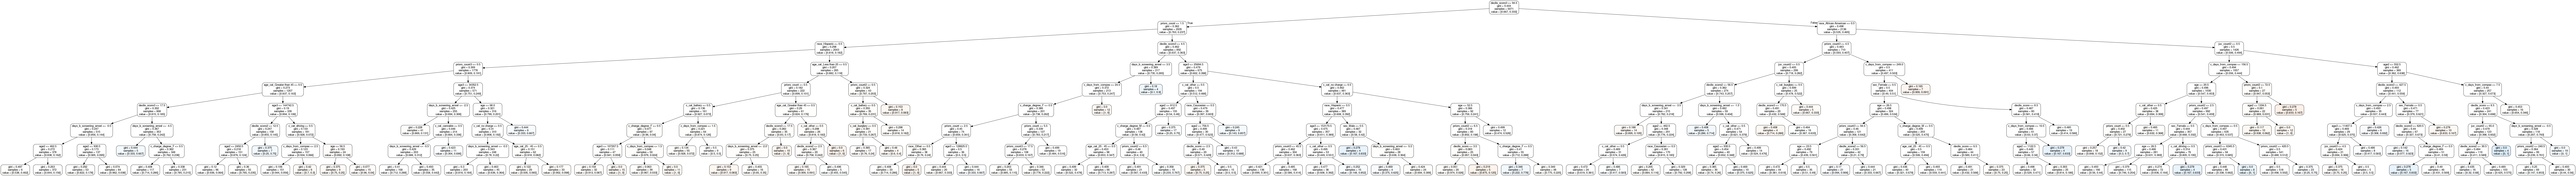

In [38]:
interpretation_plots = model_interpreter.visualize_tree([rfc.estimators_[2]], columns)

from IPython.display import Image
Image(filename = interpretation_plots[0])